In [0]:
""" Keras implementation of the paper Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks
    by Alec Radford, Luke Metz, Soumith Chintala
    Arxiv Link : https://arxiv.org/abs/1511.06434
       
""" 
import numpy as np
from keras.datasets.fashion_mnist import load_data
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Dropout

In [0]:
from keras.optimizers import Adam
def Disc(in_shape=(28,28,1)):
	net = Sequential()
	net.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
	net.add(LeakyReLU(alpha=0.2))
	net.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	net.add(LeakyReLU(alpha=0.2))
	net.add(Flatten())
	net.add(Dropout(0.4))
	net.add(Dense(1, activation='sigmoid'))
	opt = Adam(lr=0.0002, beta_1=0.5)
	net.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return net

def Gen(latent_dim):
	net = Sequential()
	init = 128 * 7 * 7
	net.add(Dense(init, input_dim=latent_dim))
	net.add(LeakyReLU(alpha=0.2))
	net.add(Reshape((7, 7, 128)))
	net.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	net.add(LeakyReLU(alpha=0.2))
	net.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	net.add(LeakyReLU(alpha=0.2))
	net.add(Conv2D(1, (7,7), activation='tanh', padding='same'))
	return net

def Combine(generator, discriminator):
	discriminator.trainable = False
	net = Sequential()
	net.add(generator)
	net.add(discriminator)
	opt = Adam(lr=0.0002, beta_1=0.5)
	net.compile(loss='binary_crossentropy', optimizer=opt)
	return net


In [0]:
def load_samples():
	(trainX, _), (_, _) = load_data()
	X = np.expand_dims(trainX, axis=-1)
	X = X.astype('float32')
	X = (X - 127.5) / 127.5
	return X

def generate_samples(dataset, n_samples):
	ix = np.random.randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]
	y = np.ones((n_samples, 1))
	return X, y

def point(latent_dim, n_samples):
	x_input = np.random.randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

def fake(generator, latent_dim, n_samples):
	x_input = point(latent_dim, n_samples)
	X = generator.predict(x_input)
	y = np.zeros((n_samples, 1))
	return X, y


In [0]:
def train(g_net, d_net, gan_net, dataset, latent_dim, n_epochs=1, batch_size=128):

	n_batches = int(dataset.shape[0] / batch_size)
	half_batch = int(batch_size / 2)

	for i in range(n_epochs):
		for j in range(n_batches):
      
			X_real, y_real = generate_samples(dataset, half_batch)
			d_loss1, _ = d_net.train_on_batch(X_real, y_real)
   
			X_fake, y_fake = fake(g_net, latent_dim, half_batch)
			d_loss2, _ = d_net.train_on_batch(X_fake, y_fake)

			X_gan = point(latent_dim, batch_size)
			y_gan = ones((batch_size, 1))

			g_loss = gan_net.train_on_batch(X_gan, y_gan)

			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, n_batches, d_loss1, d_loss2, g_loss))

	g_net.save('generator.h5')
 

In [21]:
# Train
latent_dim = 100
discriminator = Disc()
generator = Gen(latent_dim)
gan_net = Combine(generator, discriminator)
dataset = load_samples()
n_epochs = 100
train(generator, discriminator, gan_net, dataset, latent_dim, n_epochs=n_epochs)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Streaming output truncated to the last 5000 lines.
>90, 150/468, d1=0.690, d2=0.686 g=0.706
>90, 151/468, d1=0.696, d2=0.693 g=0.705
>90, 152/468, d1=0.697, d2=0.691 g=0.698
>90, 153/468, d1=0.702, d2=0.707 g=0.706
>90, 154/468, d1=0.698, d2=0.694 g=0.700
>90, 155/468, d1=0.693, d2=0.694 g=0.704
>90, 156/468, d1=0.703, d2=0.690 g=0.706
>90, 157/468, d1=0.690, d2=0.686 g=0.702
>90, 158/468, d1=0.694, d2=0.700 g=0.704
>90, 159/468, d1=0.691, d2=0.690 g=0.705
>90, 160/468, d1=0.680, d2=0.689 g=0.699
>90, 161/468, d1=0.698, d2=0.687 g=0.703
>90, 162/468, d1=0.685, d2=0.687 g=0.704
>90, 163/468, d1=0.687, d2=0.693 g=0.708
>90, 164/468, d1=0.691, d2=0.692 g=0.711
>90, 165/468, d1=0.699, d2=0.697 g=0.699
>90, 166/468, d1=0.695, d2=0.702 g=0.698
>90, 167/468, d1=0.694, d2=0.701 g=0.704
>90, 168/468, d1=0.697, d2=0.699 g=0.696
>90, 169/468, d1=0.688, d2=0.695 g=0.699
>90, 170/468, d1=0.684, d2=0.698 g=0.700
>90, 171/468, d1=0.677, d2=0.704 g=0.701
>90, 172/468, d1=0.691, d2=0.701 g=0.703
>90, 1

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


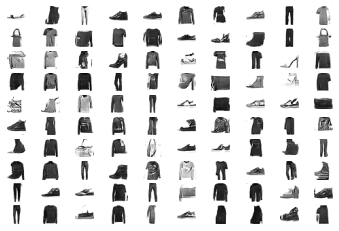

In [23]:
# Visualizing the output
from keras.models import load_model
import matplotlib.pyplot as plt

def point(latent_dim, n_samples):
	x_input = np.random.randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

def show_plot(examples, n):
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	plt.show()

net = load_model('generator.h5')
latent_points = point(100, 100)
X = net.predict(latent_points)
show_plot(X, 10)